In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [2]:
# Carrega o dataset
df = pd.read_csv('/home/cassio/Downloads/23-Cap13/dados/dataset.csv')

In [3]:
# Shape
df.shape

(9700, 11)

In [4]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [6]:
# Colunas do conjunto de dados
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [12]:
categoria = df.loc[df['Categoria'] == 'Office Supplies']

In [13]:
supplies = categoria[['Cidade', 'Valor_Venda']].groupby(['Cidade'])['Valor_Venda'].sum().sort_values(ascending=False)

In [14]:
print(f"A cidade com o maior valor de venda da categoria Office Supplies é {supplies.idxmax()} possuindo {supplies.max()} vendas")

A cidade com o maior valor de venda da categoria Office Supplies é New York City possuindo 68362.814 vendas


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [15]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst=True)

In [16]:
graf_dados = df.groupby('Data_Pedido')['Valor_Venda'].sum().sort_index(ascending=True)

<Axes: xlabel='Data_Pedido'>

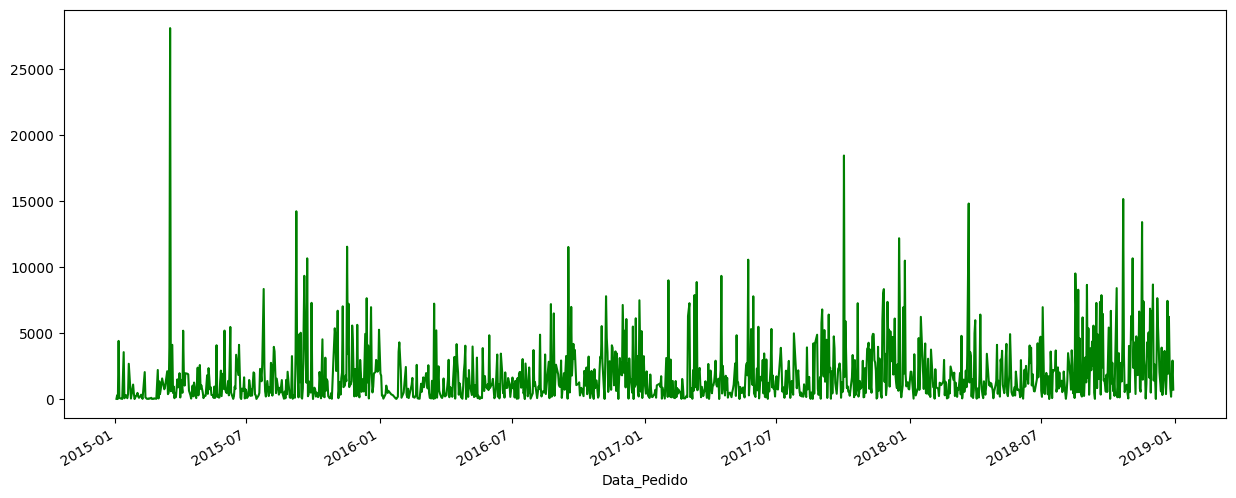

In [17]:
plt.figure(figsize=(15,6))
graf_dados.plot(x= 'Data_Pedido', y='Valor_Venda', color='green')

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [18]:
graf_dados = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

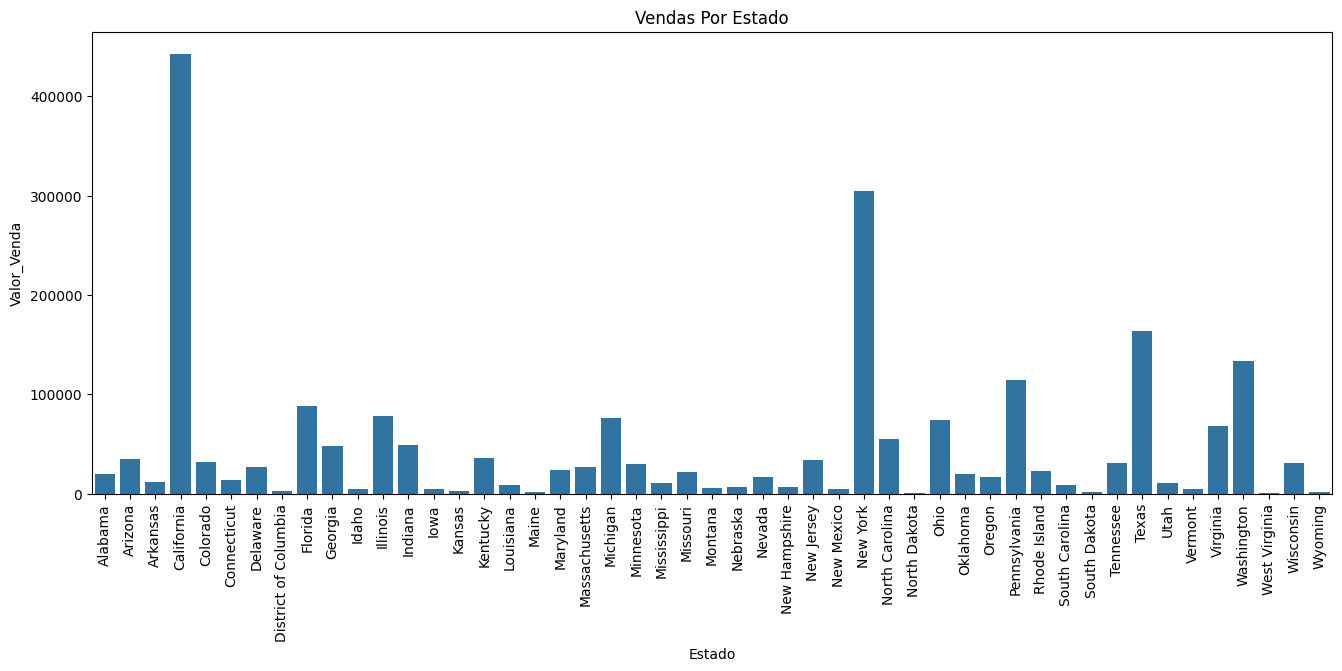

In [19]:
plt.figure(figsize=(16,6))
sns.barplot(data= graf_dados, y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation=90)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [20]:
graf_dados = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by= 'Valor_Venda', ascending=False).head(10)

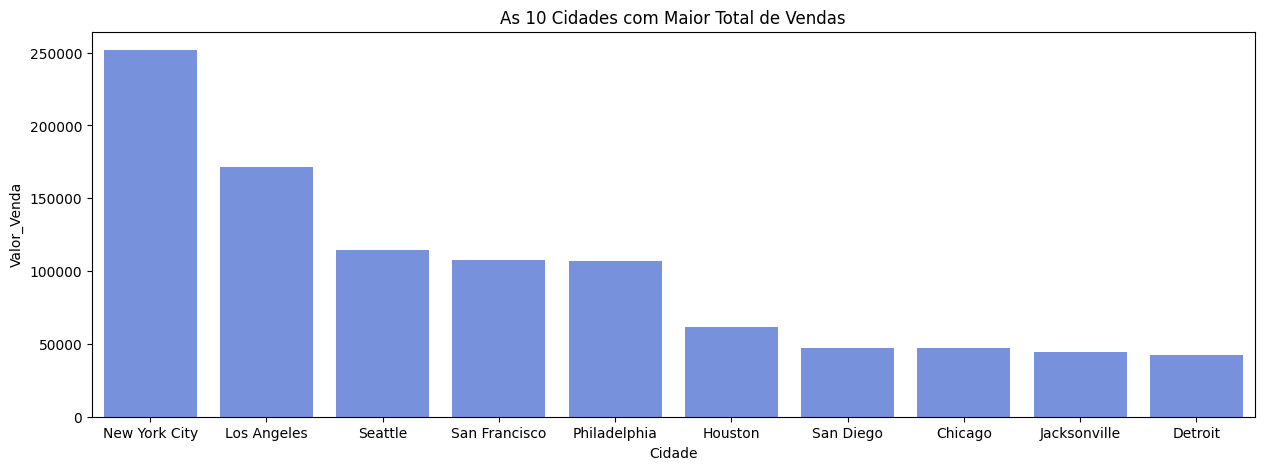

In [21]:
plt.figure(figsize=(15,5))
sns.set_palette('coolwarm')
sns.barplot(graf_dados, x= 'Cidade', y= 'Valor_Venda').set(title= 'As 10 Cidades com Maior Total de Vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [22]:
graf_dados = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()
graf_dados

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [23]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

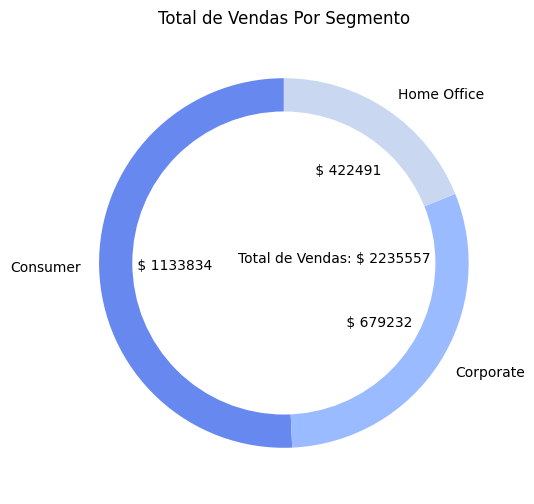

In [24]:
plt.figure(figsize=(16,6))
plt.pie(graf_dados['Valor_Venda'],
        labels= graf_dados['Segmento'],
        autopct=autopct_format(graf_dados['Valor_Venda']),
        startangle=90)

# Limpa o círculo central
centro = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centro)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(graf_dados['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()


## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [25]:
df['Ano'] = df['Data_Pedido'].dt.year
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [26]:
graf_dados = df[['Segmento', 'Valor_Venda', 'Ano']].groupby(['Segmento', 'Ano'])['Valor_Venda'].sum().reset_index().sort_values(by= ['Segmento', 'Ano'],
                                                                                                                   ascending=True)

graf_dados

,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
6,Corporate,2017,203266.7398
7,Corporate,2018,235502.7284
8,Home Office,2015,88229.0878
9,Home Office,2016,74134.1332


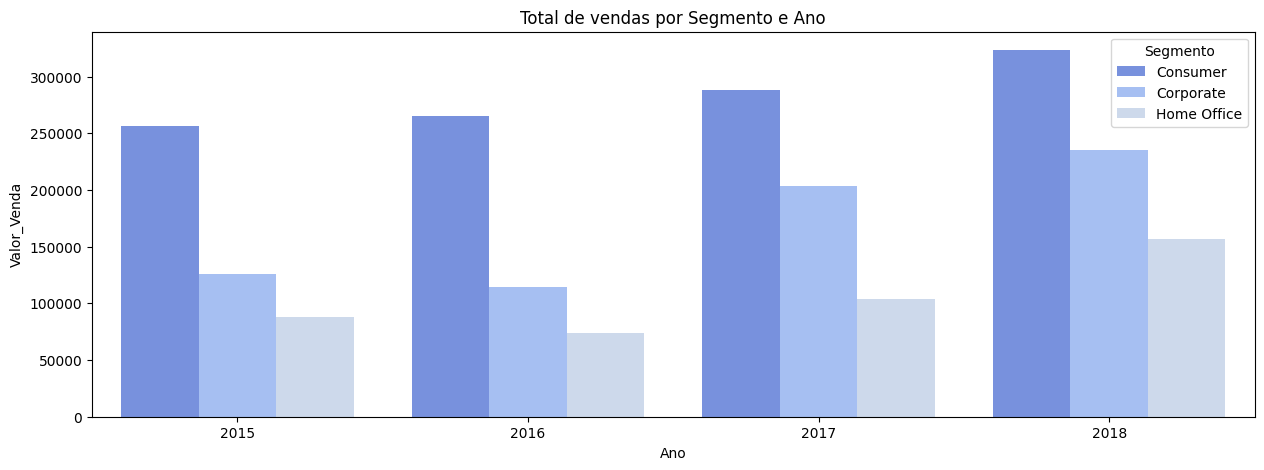

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data= graf_dados, x='Ano', y='Valor_Venda', hue='Segmento').set(title= 'Total de vendas por Segmento e Ano')
plt.show()

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [28]:
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [29]:
descontos = df['Desconto'].value_counts().reset_index()
descontos

,Desconto,count
0,0.10,9243
1,0.15,457


In [30]:
print(f"Possui-se {descontos['count'].max()} vendas com descontos de 10% e {descontos['count'].min()} descontos de 15%.")

Possui-se 9243 vendas com descontos de 10% e 457 descontos de 15%.


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [31]:
df['valor_desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,valor_desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [32]:
print(f"A média do valor das vendas antes do desconto de 15% é R$ {round(df['Valor_Venda'].loc[df['Desconto'] >= 0.15].mean(),2)} e após o desconto a média é de R$ {round(df['valor_desconto'].loc[df['Desconto'] >= 0.15].mean(),2)}")

A média do valor das vendas antes do desconto de 15% é R$ 2116.81 e após o desconto a média é de R$ 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [33]:
df['Mes'] = df['Data_Pedido'].dt.month
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,valor_desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [34]:
dados = df[['Segmento', 'Ano', 'Mes', 'Valor_Venda']].groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.mean, np.sum, np.median]).reset_index()
dados

/tmp/ipykernel_144721/2055148692.py:1: FutureWarning: The provided callable <function mean at 0x7e7d71f92170> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dados = df[['Segmento', 'Ano', 'Mes', 'Valor_Venda']].groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.mean, np.sum, np.median]).reset_index()
/tmp/ipykernel_144721/2055148692.py:1: FutureWarning: The provided callable <function sum at 0x7e7d71f91240> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dados = df[['Segmento', 'Ano', 'Mes', 'Valor_Venda']].groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].agg([np.mean, np.sum, np.median]).reset_index()
/tmp/ipykernel_144721/2055148692.py:1: FutureWarning: The provided callable <function median at 0x7e7d717d4c10> is currently usin

,Segmento,Ano,Mes,mean,sum,median
0,Consumer,2015,1,146.736787,6896.629,36.440
1,Consumer,2015,2,117.327926,3167.854,22.776
2,Consumer,2015,3,152.170564,11869.304,49.172
3,Consumer,2015,4,189.762750,9108.612,49.875
4,Consumer,2015,5,191.337439,12628.271,56.910
...,...,...,...,...,...,...
139,Home Office,2018,8,176.160606,5813.300,71.980
140,Home Office,2018,9,249.140597,19183.826,63.686
141,Home Office,2018,10,412.576597,29705.515,48.075
142,Home Office,2018,11,247.519423,24009.384,56.560


<Figure size 1500x600 with 0 Axes>

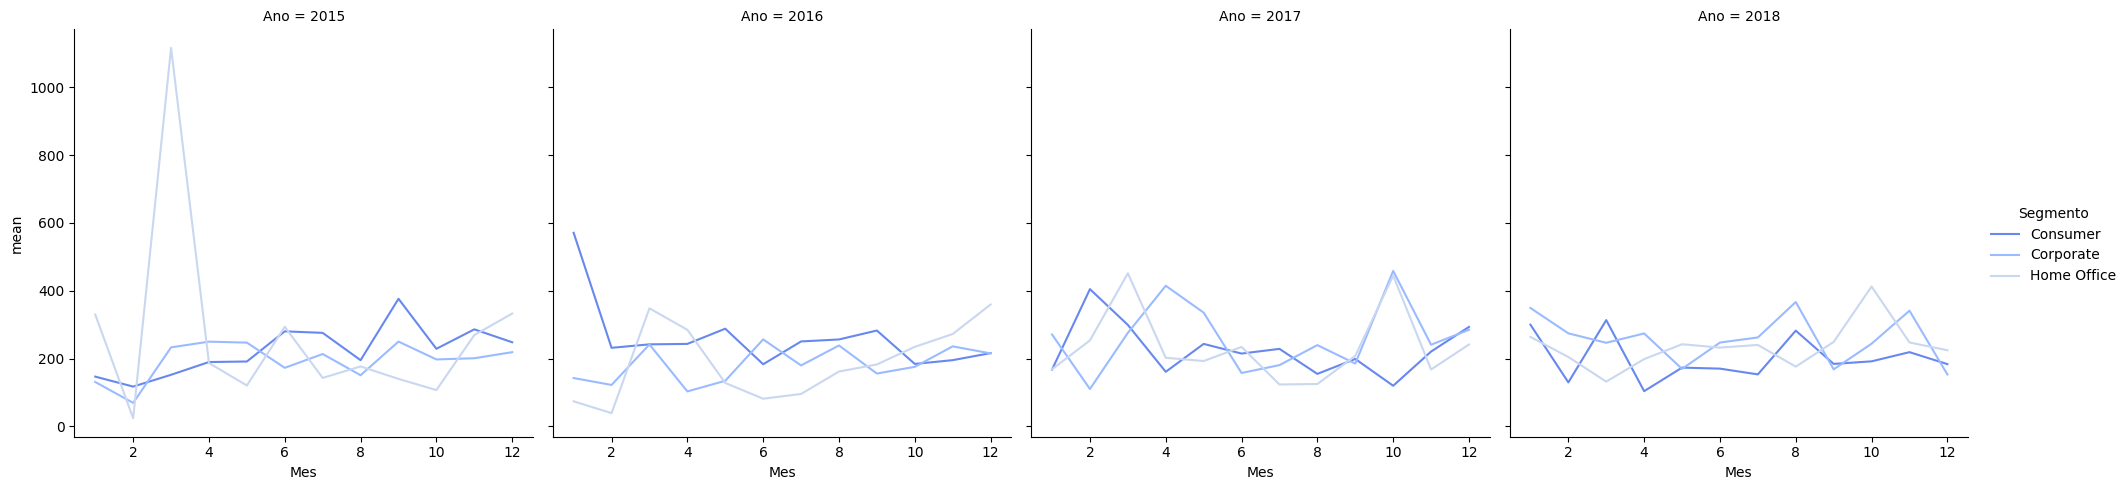

In [35]:
plt.figure(figsize=(15,6))
fig1 = sns.relplot(kind='line', data=dados, y='mean', x='Mes', hue='Segmento', col='Ano', col_wrap=4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [36]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,valor_desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [37]:
dados = df.groupby(['Categoria', 'SubCategoria']).sum(numeric_only=True).sort_values(by='Valor_Venda', ascending=False).head(12)

In [38]:
dados = dados[['Valor_Venda']].astype(int).sort_values(by= 'Categoria').reset_index()

In [39]:
categoria_dados = dados.groupby('Categoria').sum(numeric_only=True).reset_index()
categoria_dados

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [40]:
# Cores da categoria
cor_categoria = ['#5d00de', '#0ee84f', '#e80e27']


In [41]:
# Cores subcategoria
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

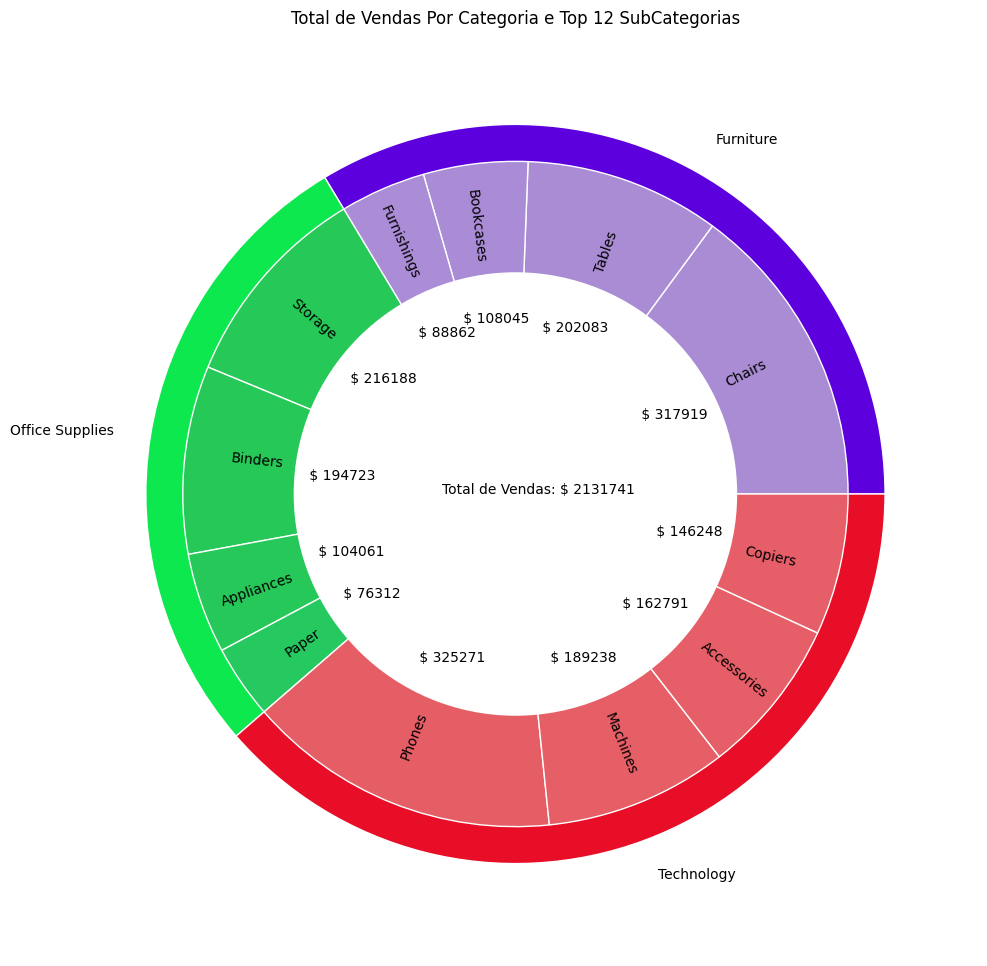

In [42]:
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(categoria_dados['Valor_Venda'], 
            radius = 1,
            labels = categoria_dados['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cor_categoria)

# Gráfico das subcategorias
p2 = ax.pie(dados['Valor_Venda'],
            radius = 0.9,
            labels = dados['SubCategoria'],
            autopct = autopct_format(dados['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centro = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centro)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(dados['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim